<img src = "https://imgur.com/HE0kDhA.jpg"  align = "center">

# **Soal Praktikum Artificial Neural Network**

Pada soal kali ini anda diminta untuk membuat model NN untuk melakukan klasifikasi dari dataset gambar sell darah dengan kasus penyakit Malaria.
dataset: https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip

Dataset berikut merupakan kumpulan gambar sel darah yang sudah disegmentasi berjumlah 27,558 gambar cell, dimana label yang dimiliki ada 2 jenis yaitu sel darah yang terinfeksi sel parasit (Parasitized), dan sel darah tidak terinfeksi parasit (Uninfected)

Total point jika dikerjakan keseluruhan 100 dan tambahan opsional bonus 15 jika model akurasi klasifikasi report dihasilkan diatas 80%

# 1. Load Data (total point 40)

Task perlu dikerjakan:
1. Unduh dataset dan ekstraksi zip (10 point)
2. Splitting dataset yaitu dengan membuat folder gambar untuk memisahkan gambar tersebut 70% sebagai data training dan 30% sebagai data testing (15 point)
3. Cek penamaan image dan tampilkan jumlah gambar dari hasil splitting dari masing-masing kelas (5 point)
4. Tampilkan 4 image per label beserta judul label dengan ukuran 2 baris x 4 kolom (10 point)

Note:
Lakukan ekstraksi (unzip) pada dataset tersebut, perlu diketahui setelah dilakukan ekstrasi terdapat dua folder pada dataset tersebut bernama Parasitized dan Uninfected, dimana pada folder Parasitized berisi sel gambar yang terinfeksi, dan folder Uninfected berisi sel gambar yang tidak terinfeksi

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Hasil pengerjaan point 1.1
# Download dataset
!wget --no-check-certificate \
    https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip \
    -O /cell_images.zip

--2020-10-21 02:47:52--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘/cell_images.zip’

/cell_images.zip    100%[===================>] 337.08M  15.4MB/s    in 24s     

2020-10-21 02:48:17 (14.3 MB/s) - ‘/cell_images.zip’ saved [353452851/353452851]



In [3]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/cell_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Sebelum melakukan splitting jalankan fungsi berikut untuk memastikan isi folder hanya berupa gambar png

In [4]:
import os
base_dataset = "/tmp/cell_images"
class_dir = ['Parasitized','Uninfected']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

Note: 
- Fungsi untuk mendapatkan jumlah train gambar
- train_len_func = lambda x: int(70/100*len(x))
- Folder baru untuk training dan validasi path untuk data train dan data validation
- base_dir = 'model_cell_images'

Hasil dari pemindahan sehingga membentuk directory struktur berikut
- model_cell_images/training/Parasitized/*file gambar training parasit
- model_cell_images/training/Uninfected/*file gambar training uninfected
- model_cell_images/validation/Parasitized/*file gambar validation parasit
- model_cell_images/validation/Uninfected/*file gambar validation uninfected

In [5]:
pip install split-folders

In [6]:
# Hasil pengerjaan point 1.2
import splitfolders
splitfolders.ratio('/tmp/cell_images', output="/tmp/model_cell_images", seed=1337, ratio=(.7, .3)) 

Copying files: 27558 files [00:04, 5973.58 files/s]


In [7]:
%ls "/tmp/model_cell_images/train/Parasitized"

Streaming output truncated to the last 5000 lines.
C182P143NThinF_IMG_20151201_172057_cell_157.png
C182P143NThinF_IMG_20151201_172057_cell_158.png
C182P143NThinF_IMG_20151201_172057_cell_159.png
C182P143NThinF_IMG_20151201_172057_cell_160.png
C182P143NThinF_IMG_20151201_172057_cell_161.png
C182P143NThinF_IMG_20151201_172057_cell_162.png
C182P143NThinF_IMG_20151201_172057_cell_163.png
C182P143NThinF_IMG_20151201_172057_cell_164.png
C182P143NThinF_IMG_20151201_172057_cell_166.png
C182P143NThinF_IMG_20151201_172057_cell_168.png
C182P143NThinF_IMG_20151201_172057_cell_169.png
C182P143NThinF_IMG_20151201_172057_cell_171.png
C182P143NThinF_IMG_20151201_172057_cell_172.png
C182P143NThinF_IMG_20151201_172057_cell_173.png
C182P143NThinF_IMG_20151201_172057_cell_174.png
C182P143NThinF_IMG_20151201_172057_cell_176.png
C182P143NThinF_IMG_20151201_172057_cell_177.png
C182P143NThinF_IMG_20151201_172057_cell_178.png
C182P143NThinF_IMG_20151201_172057_cell_179.png
C182P143NThinF_IMG_20151201_172057_ce

In [8]:
# Hasil pengerjaan point 1.3
import os

print(os.listdir('/tmp/cell_images/Parasitized')[:10])
print(os.listdir('/tmp/cell_images/Uninfected')[:10])

dir = ["/tmp/model_cell_images/train/Parasitized","/tmp/model_cell_images/train/Uninfected", "/tmp/model_cell_images/val/Parasitized", "/tmp/model_cell_images/val/Uninfected"]
for i in dir:
  list = os.listdir(i) # dir is your directory path
  number_files = len(list)
  print ("Total "+i+": "+str(number_files))

['C39P4thinF_original_IMG_20150622_114609_cell_5.png', 'C80P41ThinF_IMG_20150817_110834_cell_136.png', 'C136P97ThinF_IMG_20151005_144727_cell_128.png', 'C85P46ThinF_IMG_20150820_105748_cell_258.png', 'C170P131ThinF_IMG_20151119_120111_cell_231.png', 'C68P29N_ThinF_IMG_20150819_134112_cell_160.png', 'C48P9thinF_IMG_20150721_161412_cell_197.png', 'C174P135NThinF_IMG_20151127_135512_cell_183.png', 'C149P110ThinF_IMG_20151115_114729_cell_268.png', 'C182P143NThinF_IMG_20151201_171836_cell_151.png']
['C154P115ThinF_IMG_20151115_141407_cell_177.png', 'C228ThinF_IMG_20151112_142452_cell_85.png', 'C140P101ThinF_IMG_20151005_205406_cell_8.png', 'C120P81ThinF_IMG_20151002_130150_cell_4.png', 'C189P150ThinF_IMG_20151203_141615_cell_56.png', 'C151P112ThinF_IMG_20151115_121725_cell_72.png', 'C56P17thinF_IMG_20150728_153328_cell_93.png', 'C151P112ThinF_IMG_20151115_121843_cell_222.png', 'C91P52ThinF_IMG_20150821_123116_cell_89.png', 'C238NThinF_IMG_20151207_114914_cell_26.png']
Total /tmp/model_cell_

In [9]:
# Hasil pengerjaan point 1.4 


ValueError: ignored

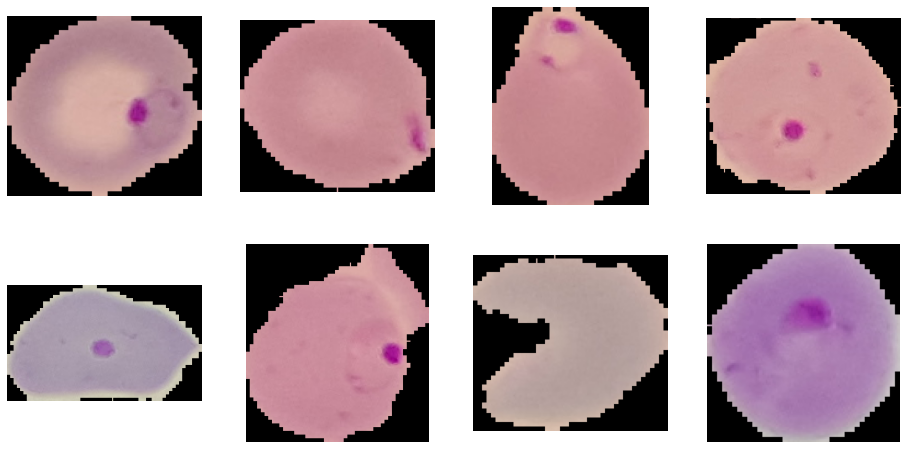

In [12]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
Parasitized = [os.path.join('/tmp/cell_images/Parasitized', fname) 
                for fname in os.listdir('/tmp/cell_images/Parasitized')[pic_index-8:pic_index]]
Uninfected = [os.path.join('/tmp/cell_images/Uninfected', fname) 
                for fname in os.listdir('/tmp/cell_images/Uninfected')[pic_index-8:pic_index]]

for i, img_path in enumerate(Parasitized+Uninfected):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

# plt.show()

# 2. Preprocessing (total point 20)

Task perlu dikerjakan:
1. Gather data train dan validation dengan ukuran gambar 100 x 100 (point 10)
2. Tampilkan shape dari data train dan data validation (point 5)
3. Normalisasi dataset, membuat dan menampilkan hasil dari label encoder (point 5)

In [13]:
# Hasil pengerjaan point 2.1
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk("/tmp/model_cell_images/train"):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [14]:
val_data = []
val_label = []
for r, d, f in os.walk("/tmp/model_cell_images/val"):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [15]:
# Hasil pengerjaan point 2.2
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (19290, 100, 100, 3)
Train Label =  (19290,)
Validation Data =  (8268, 100, 100, 3)
Validation Label =  (8268,)


In [16]:
# Hasil pengerjaan point 2.3
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]
Label sebelum di-encoder  ['Uninfected' 'Uninfected' 'Uninfected' 'Uninfected' 'Uninfected'
 'Uninfected' 'Uninfected' 'Uninfected' 'Uninfected' 'Uninfected']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


# 3. Definisikan Model (total point 20)

Buat model dengan kriteria:
- 1 layer input, ukuran layer input (shape) menjadi 100x100
- minimal 3 hidden layer dengan jumlah dense / node sesuai dengan analisa masing" menggunakan fungsi aktifasi relu
- dan 1 layer output binary

Task yang perlu dikerjakan:
1. Mendefinisikan model sesuai dengan kriteria dan menampilkan hasil summary (point 10)
2. Compiler model menggunakan Adam optimizer dan melakukan training dengan batch size 32 dan epoch sesuai dengan kemauan masing" (point 10)

In [17]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Hasil pengerjaan point 3.1


In [18]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(100, 100, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
x = layers.Dense(64, activation='relu')(x) # hidden layer 1 dengan 128 neuron
x = layers.Dense(32, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3840128   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,850,497
Trainable params: 3,850,497
Non-trainable params: 0
____________________________________________

In [ ]:
# Hasil pengerjaan point 3.2

In [19]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

In [20]:
H = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
603/603 [==============================] - 17s 27ms/step - loss: 0.7008 - acc: 0.6012 - val_loss: 0.6136 - val_acc: 0.6584
Epoch 2/20
603/603 [==============================] - 16s 27ms/step - loss: 0.6394 - acc: 0.6358 - val_loss: 0.6489 - val_acc: 0.6231
Epoch 3/20
603/603 [==============================] - 17s 28ms/step - loss: 0.6289 - acc: 0.6473 - val_loss: 0.6576 - val_acc: 0.6086
Epoch 4/20
603/603 [==============================] - 16s 27ms/step - loss: 0.6425 - acc: 0.6150 - val_loss: 0.6706 - val_acc: 0.6091
Epoch 5/20
603/603 [==============================] - 16s 27ms/step - loss: 0.6739 - acc: 0.5832 - val_loss: 0.6513 - val_acc: 0.6456
Epoch 6/20
603/603 [==============================] - 16s 27ms/step - loss: 0.6594 - acc: 0.6209 - val_loss: 0.6397 - val_acc: 0.6484
Epoch 7/20
603/603 [==============================] - 16s 27ms/step - loss: 0.6451 - acc: 0.6432 - val_loss: 0.6488 - val_acc: 0.6184
Epoch 8/20
603/603 [==============================] - 16s 27ms

# 4. Hasil Model (total point 20)

Task yang perlu dikerjakan:
1. Plot hasil training model berupa hasil validasi akurasi dan validasi loss (total 10 point)
2. Buat report klasifikasi beserta dengan keterangan labelnya (total 10 point)
3. Tambahan point 15 jika akurasi diatas 80% (Opsional)

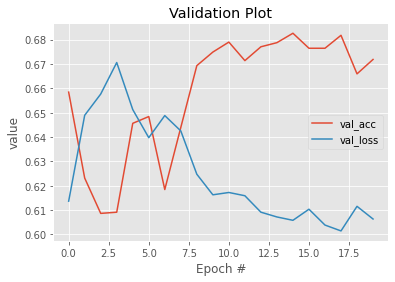

In [21]:
# Hasil pengerjaan point 4.1
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["val_acc"], label="val_acc")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.title("Validation Plot")
plt.xlabel("Epoch #")
plt.ylabel("value")
plt.legend()
plt.show()

In [22]:
# Hasil pengerjaan point 4.2
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70      4134
           1       0.72      0.57      0.63      4134

    accuracy                           0.67      8268
   macro avg       0.68      0.67      0.67      8268
weighted avg       0.68      0.67      0.67      8268

